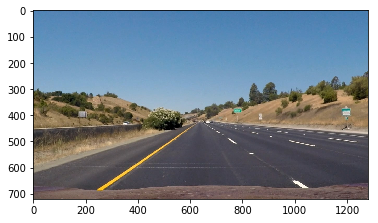

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read and display the original image
img = mpimg.imread('../test_images/straight_lines1.jpg')

plt.imshow(img)

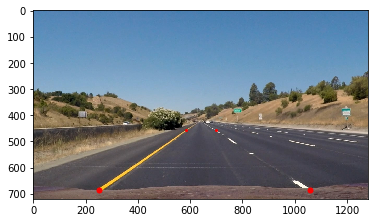

In [121]:
# source image points

plt.imshow(img)
plt.plot(585, 455, 'o', markersize=2, color='r')
plt.plot(697, 455, 'o', markersize=2, color='r')
plt.plot(250, 685, 'o', markersize=5, color='r')
plt.plot(1060, 685, 'o', markersize=5, color='r')

plt.show()

In [122]:
# Define perspective transform function
def warp(img):
    
    # Define calibration box in source (original) and destination (desired or warped) coordinates
    
    img_size = (img.shape[1], img.shape[0])
    
    # Four source coordinate
    src = np.float32(
        [[585, 455],
         [697, 455],
         [250, 685],
         [1060, 685]])
    
    # Four desired coordinates
    dst = np.float32(
        [[230, 0],
         [1075, 0],
         [250, 685],
         [1060, 685]])
    
    # Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Could compute the inverse also by swapping the input parameters
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Create warped image - uses linear interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

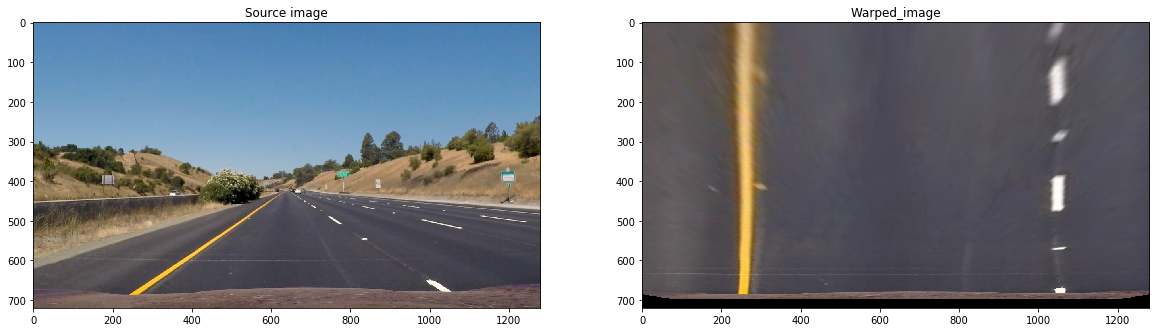

In [123]:
# Get perspective transform
warped_im = warp(img)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Source image')
ax1.imshow(img)
ax2.set_title('Warped_image')
ax2.imshow(warped_im)